## Web Coverage Service 
## Example using Python Client : OWSLib 

In [1]:
# Import WCS from owslib
from owslib.wcs import WebCoverageService
from osgeo import gdal
import matplotlib.pyplot as plt

### ECCC's GeoMet webservices: 
### Now we want the data not just a map

In [3]:
wcs_url = 'http://geo.weather.gc.ca/geomet/?lang=en&service=WCS'
# connection
wcs = WebCoverageService(wcs_url,version='1.0.0')
print(wcs.identification.title)

Meteorological Service of Canada Geospatial Web Services 2.0.6


#### Step 1
#### Let's access the 'High Resolution Deterministic Prediction System (HRDPS)' temperature data : 

variable code 'HRDPS.CONTINENTAL_TT'

How would I find this (or any other) variable code? 
use GetCapabilities request

e.g. http://geo.weather.gc.ca/geomet/?lang=en&service=WCS&request=GetCapabilities

In [4]:
# List WCS contents
temp = wcs['HRDPS.CONTINENTAL_TT']


#### Print some metadata about the wcs layer

In [6]:
dir(temp)
print(temp.boundingBoxWGS84)
print(temp.timepositions)
print(temp.supportedFormats)
#grid dimensions
print(temp.grid.highlimits)

(207.037692108399, 27.6163200590158, 316.183159429048, 69.9580565063745)
[]
['GEOTIFF_16', 'AAIGRID']
['2575', '1455']


#### Create WCS inputs

In [7]:
bbox = temp.boundingboxes[0]['bbox'] # Get the entire domain
crs = temp.boundingboxes[0]['nativeSrs'] # Coordinate system
w = 2575 
h = 1455 

#### Get the data via WCS

In [9]:
output=wcs.getCoverage(identifier='HRDPS.CONTINENTAL_TT',crs=crs,bbox=temp.boundingboxes[0]['bbox'],
                       width=w,height=h,format='GEOTIFF_16')
out_tiff = '/media/sf_VMshare/WCS_outputs/HRDPS_CONTINENTAL_TT.tiff'
f=open(out_tiff,'wb')
f.write(output.read())
f.close()


#### Load gdal and matplotlib to read and display the data





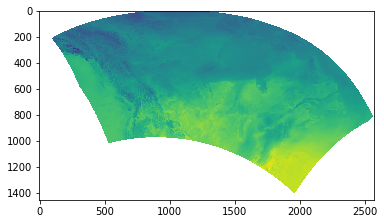

In [23]:
im = plt.imshow(ds)
